### 목표
- 선형회귀 클래스를 다뤄보자.
- 선형모델의 가중치와 절편을 확인해보자.
- 선형모델의 학습에서 중요한 경사하강법을 실습해보자.
- 다항회귀 실습진행

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 로딩
data = load_boston()
data

C:\Users\aischool\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# key값 확인
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

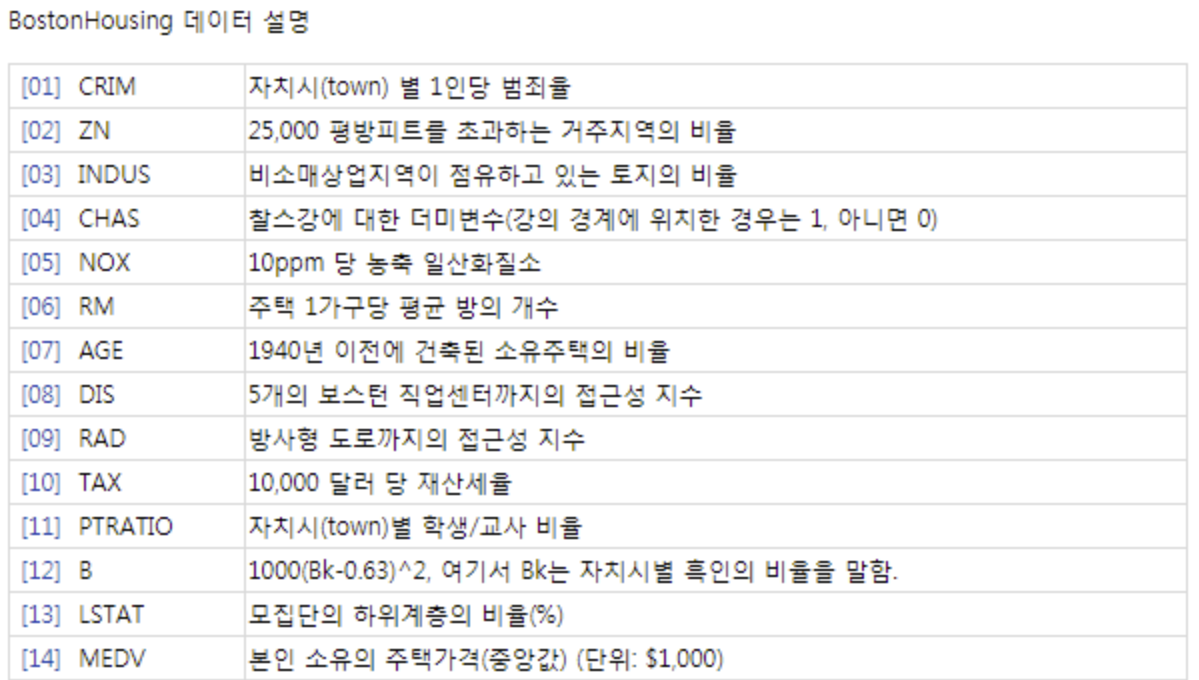

#### 문제와 답 분리

In [5]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = data['target']
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=928, test_size=0.2)

In [9]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [10]:
X_test.shape, y_test.shape

((102, 13), (102,))

#### LinearRegression 클래스
- 수학적해석 방법으로 가중치와 절편을 찾는 모델(최소 제곱법)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
pre = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test,pre))
print("MSE :", mean_squared_error(y_test,pre))
print('R2 :', r2_score(y_test,pre))

MAE : 3.436955876700315
MSE : 26.949298350385785
R2 : 0.7155134486699292


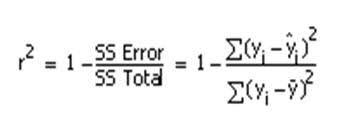

In [16]:
# 가중치와 절편확인
print('가중치 :',model.coef_)

가중치 : [-1.17616166e-01  4.57248216e-02  2.60971356e-02  3.66519161e+00
 -1.75112248e+01  3.78696087e+00 -5.18334444e-03 -1.53920889e+00
  2.94201676e-01 -1.21127094e-02 -8.66450735e-01  8.41814922e-03
 -5.31982805e-01]


In [17]:
print('절편 :',model.intercept_)

절편 : 35.85600384015736


#### 선형 모델의 학습 원리
1. 선형 모델은 최적의 가중치(w)와 절편(b)를 선택하기 위해서 mse(평균제곱오차)를 이용해 각 가설의 적합성을 판단
2. 최적의 가중치(w)와 절편(b)를 만들기 위해서 2가지 방식을 활용
    - 해석적방법(최소제곱법) : LinearRegression구현
    - 경사하강법(Gradient Descent Algorithm) : SGDRegressor구현
        - 초기 가중치로부터 기울기 값을 조금씩 수정해서 적절한 w를 찾아나가는 방식
        - 기울기가 낮아지는 방향으로 계속 업데이트하는 공식
        - 최적화함수 중에 하나

#### 가중치 변화에 따른 mse 변화 그래프를 그려보자

In [18]:
# 성적데이터 생성
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]], index = ['지영','수진','하늘','래호'], columns = ['공부시간','성적점수'])
data

,공부시간,성적점수
지영,2,20
수진,4,40
하늘,8,80
래호,9,90


#### mse함수 생성

In [19]:
# 문제, 정답, 가중치를 매개변수로 받는다.
def MSE(X,y,w): 
    # 예측값 생성
    y_pre = w*X+0 # y=ax+b
    # 실제값과 예측값의 차이의 제곱 평균 -> mse(오차)
    error = y-y_pre
    return (error**2).mean() # 평균제곱오차  

In [20]:
MSE(data['공부시간'],data['성적점수'],10) # 가중치 10일때 오차가 0이다.

0.0

In [21]:
MSE(data['공부시간'],data['성적점수'],15)

1031.25

In [22]:
MSE(data['공부시간'],data['성적점수'],5)

1031.25

##### 그래프 그리기

In [23]:
# 변화하는 가중치(w) 생성
weights = np.linspace(0,20)
weights

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [24]:
# for문 통해 가중치 변경될때마다 오차 계산
# mse_list 빈리스트 생성해서 저장

mse_list = []

for w in weights:
    error = MSE(data['공부시간'],data['성적점수'],w)
    mse_list.append(error)
mse_list

[4125.0,
 3795.1374427321953,
 3479.019158683882,
 3176.6451478550603,
 2888.015410245731,
 2613.1299458558933,
 2351.9887546855475,
 2104.5918367346935,
 1870.939192003332,
 1651.0308204914622,
 1444.8667221990836,
 1252.4468971261972,
 1073.771345272803,
 908.8400666389006,
 757.6530612244896,
 620.2103290295709,
 496.5118700541441,
 386.5576842982092,
 290.3477717617659,
 207.88213244481454,
 139.1607663473552,
 84.1836734693878,
 42.950853810912015,
 15.46230737192834,
 1.718034152436478,
 1.718034152436478,
 15.46230737192834,
 42.95085381091215,
 84.1836734693878,
 139.1607663473552,
 207.88213244481489,
 290.347771761766,
 386.5576842982092,
 496.5118700541442,
 620.2103290295709,
 757.6530612244901,
 908.8400666389006,
 1073.7713452728026,
 1252.4468971261979,
 1444.8667221990838,
 1651.0308204914627,
 1870.939192003332,
 2104.5918367346935,
 2351.988754685547,
 2613.129945855895,
 2888.015410245732,
 3176.6451478550607,
 3479.019158683883,
 3795.1374427321957,
 4125.0]

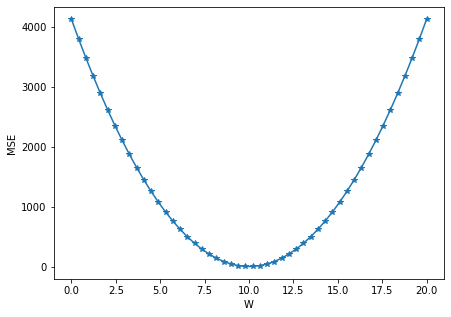

In [25]:
plt.figure(figsize=(7,5))
plt.plot(weights, mse_list, marker = '*')
plt.xlabel('W')
plt.ylabel('MSE')
plt.show()

#### 경사하강법으로 구현된 SGDRegressor사용해보기

In [26]:
from sklearn.linear_model import SGDRegressor

In [29]:
sgd_model = SGDRegressor(eta0 = 0.001, # 학습률
                        max_iter = 6000, # 반복횟수(가중치 업데이트 횟수)
                        verbose = 1) # 학습 현황 시각화

In [30]:
# 학습 시켜보기
# fit()
sgd_model.fit(data[['공부시간']], data['성적점수']) # sgd_model.fit(문제, 답)

-- Epoch 1
Norm: 1.19, NNZs: 1, Bias: 0.172587, T: 4, Avg. loss: 1902.064818
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 1, Bias: 0.293865, T: 8, Avg. loss: 1496.003802
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.73, NNZs: 1, Bias: 0.391502, T: 12, Avg. loss: 1222.558443
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.32, NNZs: 1, Bias: 0.473857, T: 16, Avg. loss: 1018.584795
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.83, NNZs: 1, Bias: 0.545088, T: 20, Avg. loss: 859.401225
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.28, NNZs: 1, Bias: 0.607697, T: 24, Avg. loss: 731.789642
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.67, NNZs: 1, Bias: 0.663352, T: 28, Avg. loss: 627.600367
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.03, NNZs: 1, Bias: 0.713248, T: 32, Avg. loss: 541.380743
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.35, NNZs: 1, Bias: 0.758277, T: 36, Avg. loss: 469.281461
Total training time: 0.00

SGDRegressor(eta0=0.001, max_iter=6000, verbose=1)

In [31]:
# Norm: 가중치, NNZs: 1, Bias: 절편, T: 528, Avg. loss: mse
print('가중치:', sgd_model.coef_)
print('절편:', sgd_model.intercept_)

가중치: [9.79124314]
절편: [1.34771511]


In [32]:
# 예측시켜보기
# predict
sgd_model.predict([[7],[5]])

C:\Users\aischool\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88641712, 50.30393084])

### 다항회귀 실습
- 선형모델의 수식에서 입력특성에 2차항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출수 있어서 성능 개선의 여지가 있음
- 선형 모델은 데이터가 많아질 수록 성능 좋아지는 특성, 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

In [33]:
from sklearn.datasets import load_boston # 보스턴 주택 가격 데이터

In [35]:
# 경고창 무시
import warnings
warnings.filterwarnings(action ='ignore')

In [36]:
boston = load_boston()

In [37]:
boston # 번치객체

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [39]:
# 번치 객체 내부의 키값 확인
boston.keys()

# data(필수) : 문제 데이터(특성, 피처, 독립변수)
# targer(필수) : 답 데이터(label, 종속변수)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [41]:
# 데이터 정보 확인
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### 데이터 분할

In [42]:
# 훈련용 데이터셋과 테스트용 데이터 셋
# 테스트 크기 30%
# 랜덤 고정값 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(boston.data,
                                                 boston.target,
                                                 test_size =0.3,
                                                 random_state =0)

# 크기 확인
print('훈련용 문제:', X_train.shape)
print('훈련용 답:', y_train.shape)
print('테스트용 문제:', X_test.shape)
print('테스트용 답:', y_test.shape)

훈련용 문제: (354, 13)
훈련용 답: (354,)
테스트용 문제: (152, 13)
테스트용 답: (152,)


특성 확장전의 모델 성능 확인 

In [44]:
linear_model = LinearRegression()

In [45]:
# 학습
# fit(훈련문제, 훈련답)
linear_model.fit(X_train,y_train)

LinearRegression()

In [47]:
# r2_score 값 출력해보기
# 평가
linear_model.score(X_test,y_test) # R squared, r2_score


0.6733825506400171

#### 다항회귀 구현
- 특성확장의 개념중 특성곱을 통해서 다항식을 만들어줌

In [55]:
# 집가격과 상관관계가 높은 컬럼을 특성확장 해보자
data_df = pd.DataFrame(X_train, columns = boston.feature_names)
data_df['PRICE']= y_train
data_df

# corr
# 상관계수
# -1 ~ 1
# 0에 가까울수록 상관x, -1과 1에 가까울수록 상대적으로 상관o
data_df.corr()['PRICE'].abs().sort_values(ascending = False) # 내림차순

PRICE      1.000000
LSTAT      0.743289
RM         0.708978
PTRATIO    0.564733
INDUS      0.504361
TAX        0.481319
NOX        0.426690
AGE        0.390942
RAD        0.389533
CRIM       0.388182
ZN         0.386115
B          0.324437
DIS        0.245634
CHAS       0.162395
Name: PRICE, dtype: float64

In [57]:
# 데이터 프레임으로 X_train, X-test 변환하기 - 인덱싱 편의
X_train = pd.DataFrame(X_train, columns = boston.feature_names)
X_test = pd.DataFrame(X_test, columns = boston.feature_names)
display(X_train.head(3))
display(X_test.head(3))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50


- 상관관계가 높은 특성에 대해 확장해보기

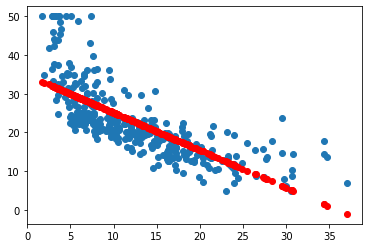

In [61]:
# 확장 전 ) 먼저 LSTAT(하위계층비율) 특성만을 가지고 학습 결과 시각화
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])

# 산점도 그래프 표현
plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], pre, color ='red')
plt.show() 

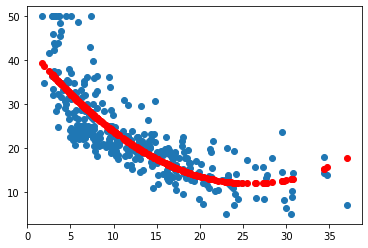

In [65]:
# 확장 후 ) LSTAT 특성곱을 통한 데이터를 가지고 학습 결과 시각화

X_train['LSTAT x LSTAT'] = X_train['LSTAT']*X_train['LSTAT']
model2 = LinearRegression()
model2.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train)
pre2 = model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])
pre2

# 산점도 그래프 시각화
plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], pre2, color ='red')
plt.show()

In [66]:
# LSTAT 특성확장 -> X_test 적용
X_test['LSTAT x LSTAT'] = X_test['LSTAT'] * X_test['LSTAT']
X_test['LSTAT x LSTAT']

# 학습, 평가
linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)
linear_model2.score(X_test, y_test)

0.6978697736472481

- RM 특성 확장 전, 후 비교
- X_test에도 반영하여 최종평가 확인(성능이 개선됐을까?)

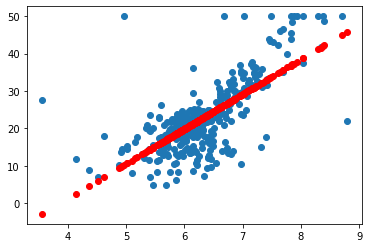

In [68]:
# 확장 전 ) 먼저 RM(하위계층비율) 특성만을 가지고 학습 결과 시각화
model3 = LinearRegression()
model3.fit(X_train[['RM']], y_train)
pre3 = model3.predict(X_train[['RM']])

# 산점도 그래프 표현
plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre3, color ='red')
plt.show() 

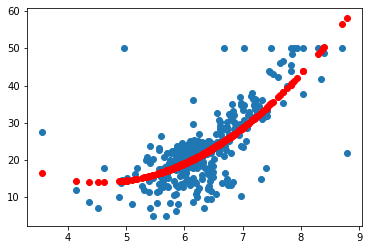

In [69]:
# 확장 후 ) RM 특성곱을 통한 데이터를 가지고 학습 결과 시각화

X_train['RM x RM'] = X_train['RM']*X_train['RM']
model4 = LinearRegression()
model4.fit(X_train[['RM', 'RM x RM']], y_train)
pre4 = model4.predict(X_train[['RM', 'RM x RM']])
pre4

# 산점도 그래프 시각화
plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre4, color ='red')
plt.show()

In [70]:
# RM 특성확장 -> X_test 적용
X_test['RM x RM'] = X_test['RM'] * X_test['RM']
X_test['RM x RM']

# 학습, 평가
linear_model3 = LinearRegression()
linear_model3.fit(X_train, y_train)
linear_model3.score(X_test, y_test) # 75%

0.7460776611187943

- 모든 데이터 특성 확장해보기

In [71]:
# 개별 특성 확장 컬럼은 삭제하고 진행
X_train.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace = True)
X_test.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace = True)

In [72]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(13)
memory usage: 36.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null

In [ ]:
# copy() :  원본복사 -> 깊은복사
# X.copy() 복사해서 z담기
# z = X 위치 복사 -> 얕은 복사, X 데이터 변할때 z변함

In [73]:
extended_X_train = X_train.copy()

In [75]:
for col1 in X_train.columns: # 컬럼의 갯수만큼 반복, 13번 반복
    for col2 in X_train.columns: # 13번 반복
        extended_X_train[col1+'x'+col2] = X_train[col1] * X_train[col2]

In [76]:
extended_X_train.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,...,0.0,21.47184,172.70379,3441.000,49.529754,137.64,15037.17,729.492,13657.3290,1184.0481
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,...,0.0,3.58672,50.53874,453.751,30.282275,23.19,1723.79,143.778,3053.0408,59.7529
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,...,0.0,10.58304,107.44160,1665.472,35.797472,67.84,7411.52,359.552,6693.6032,287.6416


In [77]:
extended_X_test = X_test.copy()
for col1 in X_test.columns: # 컬럼의 갯수만큼 반복, 13번 반복
    for col2 in X_test.columns: # 13번 반복
        extended_X_test[col1+'x'+col2] = X_test[col1] * X_test[col2]
extended_X_test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,...,0.0,3.37640,46.48422,126.248,38.275164,29.36,3156.20,124.046,2754.0414,53.8756
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,...,0.0,6.01343,59.23848,953.000,11.141523,228.72,6346.98,192.506,3489.4095,90.8209
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,...,10.5,5.77500,66.91650,970.200,35.314650,52.50,2898.00,172.200,4134.2700,110.2500


In [79]:
# 컬럼명만 확인
extended_X_train.columns[:30]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CRIMxCRIM', 'CRIMxZN', 'CRIMxINDUS',
       'CRIMxCHAS', 'CRIMxNOX', 'CRIMxRM', 'CRIMxAGE', 'CRIMxDIS', 'CRIMxRAD',
       'CRIMxTAX', 'CRIMxPTRATIO', 'CRIMxB', 'CRIMxLSTAT', 'ZNxCRIM', 'ZNxZN',
       'ZNxINDUS', 'ZNxCHAS'],
      dtype='object')

In [80]:
# 모델 생성
linear_model3 = LinearRegression()
# 모델 학습
linear_model3.fit(extended_X_train, y_train)
# 모델 평가
linear_model3.score(extended_X_test, y_test)

0.6486839500099861

#### 정규화 모델 등장!
- w값 제어해서 과대적합 해소
- Ridge, Lasso : w를 제어하기 위해 나온 규제 모델

In [81]:
from sklearn.linear_model import Ridge

In [85]:
ridge_model =Ridge(alpha = 150) # alpha : 규제 정도 지정

In [86]:
ridge_model.fit(extended_X_train, y_train)

ridge_model.score(extended_X_test, y_test)

0.7770345268527621

#### 규제모델 하이퍼파라미터 튜닝

In [87]:
from sklearn.linear_model import Lasso

In [89]:
# 7개 규제 적용(규제 작은 -> 큰)
R_score_list = []
L_score_list = []
for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000] :
    R_model = Ridge(alpha=alpha) # L2규제
    L_model = Lasso(alpha=alpha) # L1규제
    # 모델 학습
    R_model.fit(extended_X_train, y_train)
    L_model.fit(extended_X_train, y_train)
    # 모델 평가
    R_score_list.append(R_model.score(extended_X_test,y_test))
    L_score_list.append(L_model.score(extended_X_test,y_test))
    

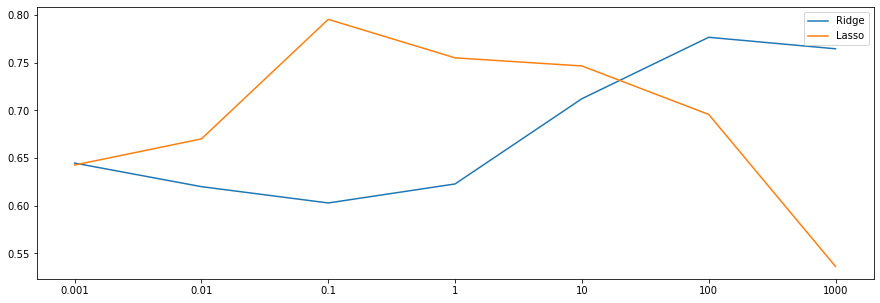

In [91]:
# 시각화
plt.figure(figsize=(15,5)) # 가로 세로 크기 설정
plt.plot(range(7), R_score_list, label="Ridge")
plt.plot(range(7), L_score_list, label="Lasso")
plt.legend() # 범례
plt.xticks(range(7),[0.001, 0.01, 0.1, 1, 10, 100, 1000])
plt.show() # 그림 보여주기